# Test of Resampling Methods

## Define Resampling Functions

In [138]:
import pandas as pd
import numpy as np
import scipy.signal
import time

%matplotlib inline

In [139]:
def resample_interpolation(signal, sampling_rate, sampling_rate_desired):
    # calculate new length of sample
    if sampling_rate == sampling_rate_desired:
        return(signal)
    new_length = int(len(signal)*sampling_rate_desired/sampling_rate)
    resampled_signal = np.interp(
        np.linspace(0.0, 1.0, new_length, endpoint=False),  # where to interpolate
        np.linspace(0.0, 1.0, len(signal), endpoint=False),  # known positions
        signal,  # known data points
    )
    return(resampled_signal)

In [140]:
def resample_fft(signal, sampling_rate, sampling_rate_desired):
    if sampling_rate == sampling_rate_desired:
        return(signal)
    new_length = int(len(signal)*sampling_rate_desired/sampling_rate)
    resampled_signal = scipy.signal.resample(signal, new_length)
    return(resampled_signal)

## Utility Functions

In [141]:
def generate_signal(length=1000, end=20):
    signal = np.cos(np.linspace(start=0, stop=end, num=length))
    return(signal)

In [142]:
def resample(signal):
    
    t0 = time.time()
    interpolation = resample_interpolation(resample_interpolation(signal, 100, 50), 50, 100)
    t_interpolation = (time.time() - t0) * 100
    
    t0 = time.time()
    fft = resample_fft(resample_fft(signal, 100, 50), 50, 100)
    t_fft = (time.time() - t0) * 100
    
    data = pd.DataFrame({"Original": signal,
                         "Interpolation": interpolation,
                         "FFT": fft})
    data["Signal_Length"] = len(signal)
    
    timings = pd.DataFrame({"Interpolation": [t_interpolation],
                            "FFT": [t_fft]})
    timings["Signal_Length"] = len(signal)
    return(data, timings)

In [143]:
def get_difference(data):
    diff = pd.DataFrame({"Interpolation": data["Original"] - data["Interpolation"],
                         "FFT": data["Original"] - data["FFT"]})
    return(diff)

## Check Functions

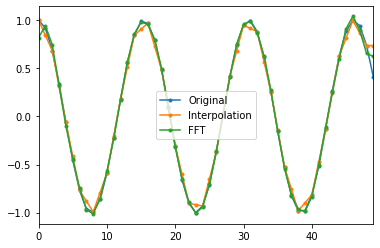

In [144]:
data, timing = resample(np.cos(np.linspace(start=0, stop=20, num=50)))
data.iloc[:,:-1].plot(style='.-')

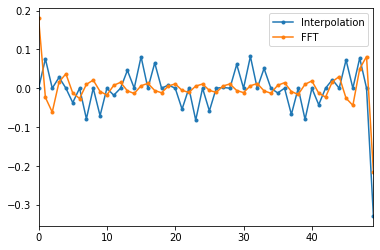

In [145]:
get_difference(data).plot(style='.-')

## Run Test

In [155]:
# This takes some time
timings = []
diffs = []
for length in range(10, 10**4, 10):
    for i in range(100):
        end = np.random.randint(1, 5000)
        data, timing = resample(generate_signal(length, end))
        diff = get_difference(data)
        diff = pd.DataFrame(diff.median()).transpose()
        diffs += [diff]
        timings += [timing]
timings = pd.concat(timings)
diffs = pd.concat(diffs)

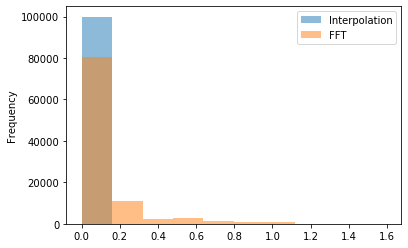

In [156]:
timings.iloc[:,:-1].plot.hist(alpha=0.5)

In [158]:
timings.iloc[:,:-1].describe()

,Interpolation,FFT
count,99900.000000,99900.000000
mean,0.024118,0.115448
std,0.042640,0.186216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.099683
75%,0.000000,0.099778
max,0.145459,1.595759


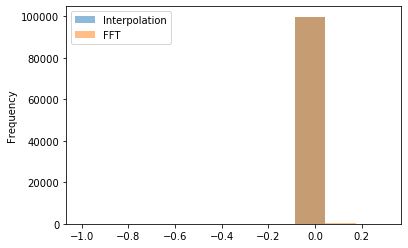

In [165]:
diffs.plot.hist(alpha=0.5)

In [164]:
diffs.describe()

,Interpolation,FFT
count,99900.000000,9.990000e+04
mean,-0.000235,7.635762e-05
std,0.013918,9.269681e-03
min,-0.999854,-4.933294e-01
25%,0.000000,-7.989809e-09
50%,0.000000,4.617973e-13
75%,0.000000,2.278078e-08
max,0.000000,3.047420e-01
